In [54]:
import numpy as np
import pandas as pd

# Load the datasets
male = np.genfromtxt('E:/CAPSTONE 1/nhanes_adult_male_bmx_2020.csv', delimiter=',', skip_header=1)
female = np.genfromtxt('E:/CAPSTONE 1/nhanes_adult_female_bmx_2020.csv', delimiter=',', skip_header=1)
male = (pd.DataFrame(male)).to_numpy()
female = (pd.DataFrame(female)).to_numpy()
male = male[~np.isnan(male).any(axis=1)]
female = female[~np.isnan(female).any(axis=1)]

Plotting Histograms of Weights

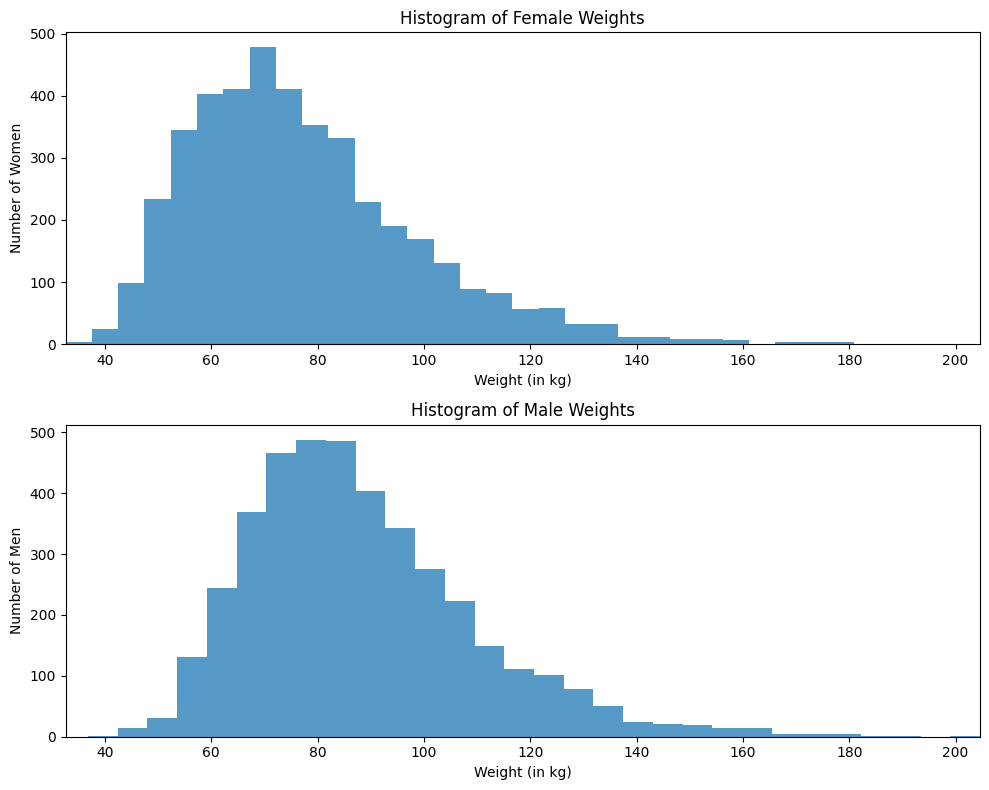

In [55]:
import matplotlib.pyplot as plt

# Extract weights directly from the numpy arrays
male_weights = male[:, 0]
female_weights = female[:, 0]

# Determine x-axis limits
x_limits = [min(min(male_weights), min(female_weights)), max(max(male_weights), max(female_weights))]

# Plot histograms
plt.figure(figsize=(10, 8))

# First histogram (Female Weights)
plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=30, alpha=0.75)
plt.xlim(x_limits)
plt.title('Histogram of Female Weights')
plt.xlabel('Weight (in kg)')
plt.ylabel('Number of Women')

# Second histogram (Male Weights)
plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=30, alpha=0.75)
plt.xlim(x_limits)
plt.title('Histogram of Male Weights')
plt.xlabel('Weight (in kg)')
plt.ylabel('Number of Men')

plt.tight_layout()
plt.show()


Boxplot of Weights as it compares the distribution of weights between females and males.

C:\Users\hp\AppData\Local\Temp\ipykernel_11744\798755738.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])


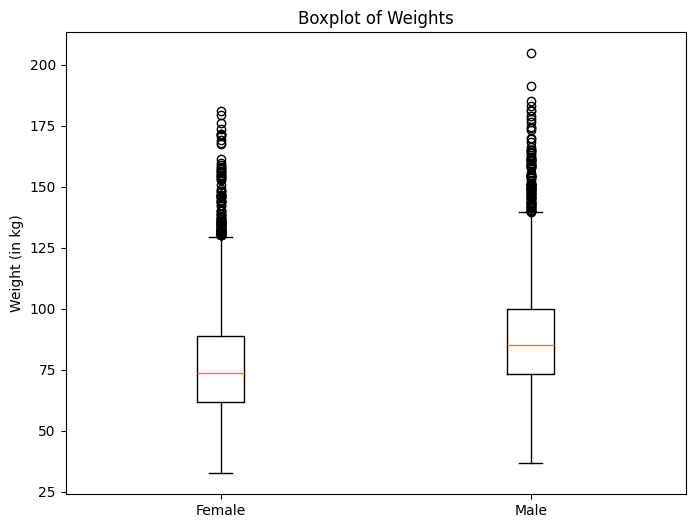

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])
plt.title('Boxplot of Weights')
plt.ylabel('Weight (in kg)')  # Adding label for the y-axis
plt.show()




Numerical Aggregates such as mean, median, standard deviation, variance, skewness, kurtosis for male and female weights.

In [57]:
def compute_aggregates(weights):
    return {
        'mean': np.mean(weights),
        'median': np.median(weights),
        'std_dev': np.std(weights),
        'variance': np.var(weights),
        'skewness': scipy.stats.skew(weights),
        'kurtosis': scipy.stats.kurtosis(weights)
    }

import scipy.stats

female_aggregates = compute_aggregates(female_weights)
male_aggregates = compute_aggregates(male_weights)

print("Female Weight Aggregates:", female_aggregates)
print("Male Weight Aggregates:", male_aggregates)


Female Weight Aggregates: {'mean': np.float64(77.40379057095475), 'median': np.float64(73.6), 'std_dev': np.float64(21.54250829019315), 'variance': np.float64(464.07966343304065), 'skewness': np.float64(1.03336107186799), 'kurtosis': np.float64(1.4009683480659731)}
Male Weight Aggregates: {'mean': np.float64(88.36454300416565), 'median': np.float64(85.0), 'std_dev': np.float64(21.418936717962495), 'variance': np.float64(458.770850128082), 'skewness': np.float64(0.9842810741662347), 'kurtosis': np.float64(1.4742884754078238)}


Adding an eighth column to the female matrix representing the Body Mass Index (BMI) for each female participant.

In [58]:
female_bmi = female_weights / (female[:, 1] / 100) ** 2
female = np.column_stack((female, female_bmi))


Standardizing the Female Dataset

In [59]:
zfemale = (female - female.mean(axis=0)) / female.std(axis=0)



In [60]:
# Calculate BMI for females
female_weights = female[:, 0]  # weights are in the first column
female_heights = female[:, 1]  # heights are in the second column
female_bmi = female_weights / (female_heights / 100) ** 2

# Add BMI as the 8th column to the female array
female = np.column_stack((female, female_bmi))


In [61]:
print("Male shape:", male.shape)
print("Female shape:", female.shape)


Male shape: (4081, 7)
Female shape: (4221, 9)


drawing a scatterplot matrix for the standardized versions of selected columns and compute Pearson’s and Spearman’s correlation coefficients.

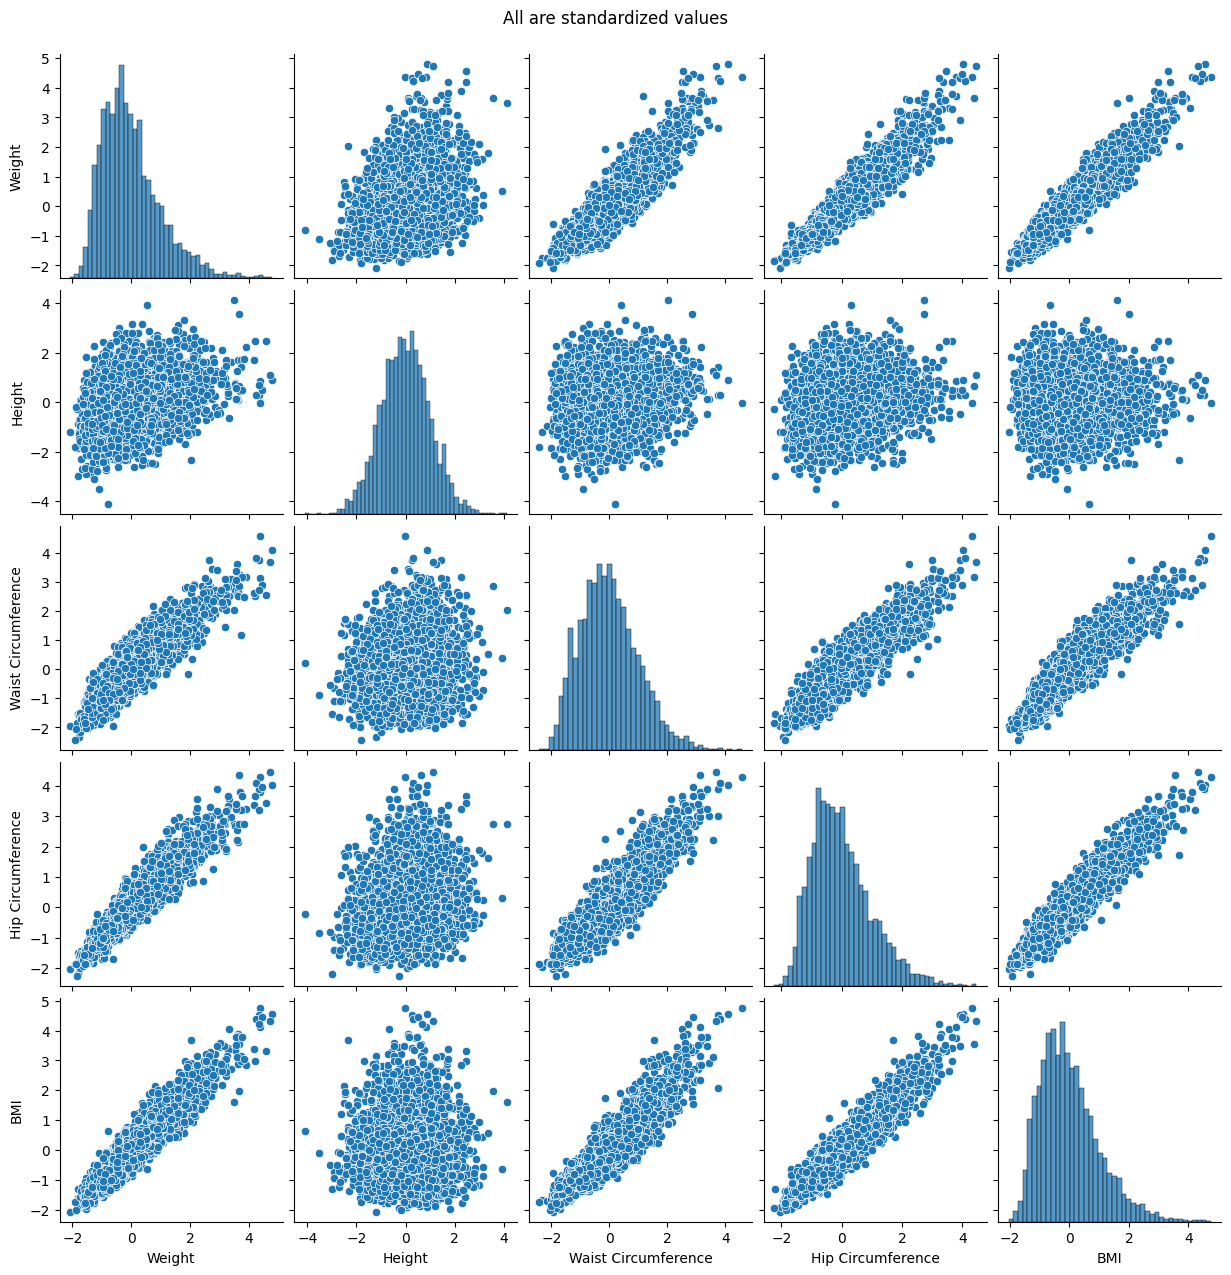

Pearson Correlation:
                        Weight    Height  Arm Length  Leg Length  \
Weight               1.000000  0.345496    0.551563    0.193186   
Height               0.345496  1.000000    0.667911    0.657202   
Arm Length           0.551563  0.667911    1.000000    0.475645   
Leg Length           0.193186  0.657202    0.475645    1.000000   
Arm Circumference    0.905385  0.151955    0.453122    0.079876   
Hip Circumference    0.946553  0.202895    0.459400    0.100268   
Waist Circumference  0.904550  0.126547    0.427893   -0.034803   
BMI                  0.945900  0.033077    0.364660   -0.014819   

                     Arm Circumference  Hip Circumference  \
Weight                        0.905385           0.946553   
Height                        0.151955           0.202895   
Arm Length                    0.453122           0.459400   
Leg Length                    0.079876           0.100268   
Arm Circumference             1.000000           0.868063   
Hip Circ

In [68]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for the scatterplot matrix
df = pd.DataFrame(zfemale, columns=['Weight', 'Height', 'Arm Length', 'Leg Length', 'Arm Circumference', 'Hip Circumference', 'Waist Circumference', 'BMI'])

# Create the scatterplot matrix
pairplot = sns.pairplot(df[['Weight', 'Height', 'Waist Circumference', 'Hip Circumference', 'BMI']])

# Add a title to the scatterplot matrix
plt.suptitle('All are standardized values', y=1.02)  # y=1.02 adjusts the title position

# Show the plot
plt.show()

# Compute correlation coefficients
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')

print("Pearson Correlation:\n", pearson_corr)
print("Spearman Correlation:\n", spearman_corr)


Waist-to-Height and Waist-to-Hip Ratios

In [63]:
# Compute ratios
male_whr = male[:, 6] / male[:, 5]
male_whtr = male[:, 6] / male[:, 1]

female_whr = female[:, 6] / female[:, 5]
female_whtr = female[:, 6] / female[:, 1]

# Add columns to matrices
male = np.column_stack((male, male_whr, male_whtr))
female = np.column_stack((female, female_whr, female_whtr))


Adding WHR and WHTR Columns

In [64]:
# Calculate WHR and WHTR for males
male_whr = male[:, 6] / male[:, 5]  # waist circumference / hip circumference
male_whtr = male[:, 6] / male[:, 1]  # waist circumference / height

# Add WHR and WHTR to the male array
male = np.column_stack((male, male_whr, male_whtr))

# Calculate WHR and WHTR for females
female_whr = female[:, 6] / female[:, 5]  # waist circumference / hip circumference
female_whtr = female[:, 6] / female[:, 1]  # waist circumference / height

# Add WHR and WHTR to the female array
female = np.column_stack((female, female_whr, female_whtr))


plotting the boxplot for WHR and WHTR for both males and females using the last two columns of each array.

C:\Users\hp\AppData\Local\Temp\ipykernel_11744\785379981.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female[:, -2], male[:, -2], female[:, -1], male[:, -1]],


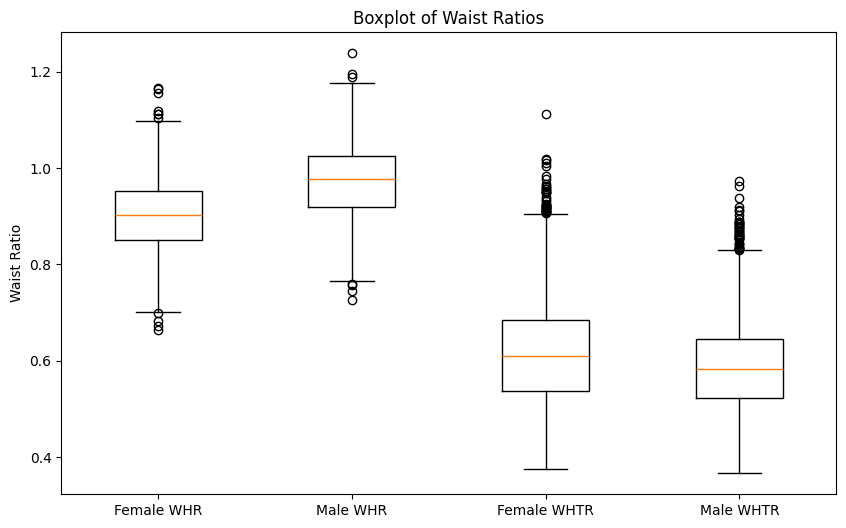

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot boxplot
plt.boxplot([female[:, -2], male[:, -2], female[:, -1], male[:, -1]], 
            labels=['Female WHR', 'Male WHR', 'Female WHTR', 'Male WHTR'])

plt.title('Boxplot of Waist Ratios')
plt.ylabel('Waist Ratio')  # Add y-axis label
plt.show()


In [66]:
# Sort by BMI
sorted_indices = np.argsort(zfemale[:, 7])

# Get the top 5 and bottom 5
extreme_bmis = np.concatenate((zfemale[sorted_indices[:5]], zfemale[sorted_indices[-5:]]), axis=0)
print("Standardized Measurements for Extremes:\n", extreme_bmis)


Standardized Measurements for Extremes:
 [[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]
 [ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54270932]
 [ 4.36328993 -0.03353037 -0.05585782 -0.17357792  2.

Summary and Discussion of Results

Histograms of Weights:
Female Weights: Clustered around a lower mean, indicating generally lighter weights.
Male Weights: Higher mean and more spread, indicating greater variability.

Boxplot Comparison:
Male Weights: Higher median and interquartile range (IQR), indicating greater weight variation and more outliers.
Female Weights: Lower median and less variability.

Numerical Aggregates:
Mean/Median: Higher for males.
Dispersion: Greater standard deviation in males.
Skewness: Slight right skewness for both, more pronounced in males.

Waist Ratios:
WHR (Waist-to-Hip Ratio): Lower median and less variability for females.
WHTR (Waist-to-Height Ratio): Similar medians, but females are more consistent.

Interpretation:
Weight Distribution: Males are heavier and more variable in weight.
Body Shape: Females have lower WHR, reflecting more hourglass figures, while males have higher WHR, indicating rectangular shapes.

Summary and Discussion of Results

Histograms of Weights:
Female Weights: Clustered around a lower mean, indicating generally lighter weights.
Male Weights: Higher mean and more spread, indicating greater variability.

Boxplot Comparison:
Male Weights: Higher median and interquartile range (IQR), indicating greater weight variation and more outliers.
Female Weights: Lower median and less variability.

Numerical Aggregates:
Mean/Median: Higher for males.
Dispersion: Greater standard deviation in males.
Skewness: Slight right skewness for both, more pronounced in males.

Waist Ratios:
WHR (Waist-to-Hip Ratio): Lower median and less variability for females.
WHTR (Waist-to-Height Ratio): Similar medians, but females are more consistent.

Interpretation:
Weight Distribution: Males are heavier and more variable in weight.
Body Shape: Females have lower WHR, reflecting more hourglass figures, while males have higher WHR, indicating rectangular shapes.